In [41]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

### Data Preparation and Filtering

In [42]:
income_grouping_2019 = pd.read_csv('./datasets/World Bank Income Grouping 2019.csv')
income_grouping_2019.fillna("-")
income_grouping_2019.head(5)

,region_code,region_name,country_code,country_name,income_grouping
0,EU,Europe,ALB,Albania,Upper Middle Income
1,NAC,North America and the Caribbean,ATG,Antigua and Barbuda,High Income
2,CSA,Central and South America,ARG,Argentina,High Income
3,AS,Asia,ARM,Armenia,Low Middle Income
4,OA,Oceania,AUS,Australia,High Income


In [43]:
ihd_df = pd.read_csv('./datasets/Ischaemic Heart Disease.csv')

# Get only the necessary data for the analysis
# NOTE: Records before 1963 were removed due to missing data for Low Middle Income
ihd_df_filtered = ihd_df.query("sex == ['Male', 'Female'] and age_group == '[All]' and (year >= 1963 and year < 2020)")
ihd_df_filtered = ihd_df_filtered.fillna(0)
ihd_df[['year']] = ihd_df[['year']].astype(str)
ihd_df_filtered.head(5)

,region_code,region_name,country_code,country_name,year,sex,age_group_code,age_group,num_of_death,percentage_cause_specific_deaths_out_of_total_deaths,age_standardized_death_rate_per_100000,death_rate_per_100000
21,EU,Europe,ALB,Albania,1987,Male,Age_all,[All],662.0,6.870071,72.111872,41.787653
43,EU,Europe,ALB,Albania,1987,Female,Age_all,[All],315.0,4.096229,28.392868,21.114016
87,EU,Europe,ALB,Albania,1988,Male,Age_all,[All],675.0,6.983963,71.458334,41.767217
105,EU,Europe,ALB,Albania,1988,Female,Age_all,[All],347.0,4.560988,30.665538,22.798949
148,EU,Europe,ALB,Albania,1989,Male,Age_all,[All],767.0,7.516660,80.997218,46.822538


In [44]:
# Merge the selected fields from the Ischeamic Heart Disease and the Income Grouping 2019 tables
ihd_with_ig_df = ihd_df_filtered[['country_code', 'country_name', 'year', 'sex', 'death_rate_per_100000']].merge(income_grouping_2019[['country_code', 'income_grouping']], on='country_code')
ihd_with_ig_df.head(5)

,country_code,country_name,year,sex,death_rate_per_100000,income_grouping
0,ALB,Albania,1987,Male,41.787653,Upper Middle Income
1,ALB,Albania,1987,Female,21.114016,Upper Middle Income
2,ALB,Albania,1988,Male,41.767217,Upper Middle Income
3,ALB,Albania,1988,Female,22.798949,Upper Middle Income
4,ALB,Albania,1989,Male,46.822538,Upper Middle Income


### Method Declaration

In [45]:
def groupByIncomeGroupingAndYear(df, income_grouping):
    # Group the records, then aggregate the records by Year
    df_grp_by_income = df.get_group(income_grouping)
    df_grp_by_income_and_year = df_grp_by_income[['year', 'death_rate_per_100000']].groupby('year', as_index=False).agg(death_rate_per_100000 = ('death_rate_per_100000', 'mean'))

    print(f"Income Grouping: {income_grouping}\n")
    print(df_grp_by_income_and_year)
    
    return df_grp_by_income_and_year


def groupByIncomeGroupingAndSex(df, sex):
    # Group the records, then aggregate the records by Year
    df_grp_by_sex = df.get_group(sex)
    df_grp_by_sex_and_year = df_grp_by_sex[['year', 'death_rate_per_100000']].groupby('year', as_index=False).agg(death_rate_per_100000 = ('death_rate_per_100000', 'mean'))

    print(f"Income Grouping: {sex}\n")
    print(df_grp_by_sex_and_year)
    
    return df_grp_by_sex_and_year

### Data Analysis on Income Grouping

In [46]:
# Group data by income_grouping
ihd_with_ig_grp_income = ihd_with_ig_df.groupby(['income_grouping']) 

# Display summary statistics of 'death_rate_per_100000' for each income group   
ihd_with_ig_grp_income['death_rate_per_100000'].describe()  

,count,mean,std,min,25%,50%,75%,max
income_grouping,,,,,,,,
High Income,4534.0,154.848735,107.283325,0.0,73.599065,125.412959,213.380100,579.076413
Low Middle Income,786.0,154.997587,172.433740,0.0,29.031523,82.774710,207.790301,724.350364
Upper Middle Income,3014.0,92.067105,99.350514,0.0,29.056423,51.591099,124.696234,594.349937


In [47]:
# Group the records by 'High Income' bracket, then aggregate the records by Year
ihd_with_ig_grp_high_income_and_year = groupByIncomeGroupingAndYear(ihd_with_ig_grp_income, 'High Income')

year_by_high_income = ihd_with_ig_grp_high_income_and_year['year']
death_rate_per_100000_by_high_income = ihd_with_ig_grp_high_income_and_year['death_rate_per_100000']

Income Grouping: High Income
    year  death_rate_per_100000
0   1963             174.999186
1   1964             175.782610
2   1965             191.894754
3   1966             180.599318
4   1967             189.654252
5   1968             180.035048
6   1969             167.161846
7   1970             166.166120
8   1971             167.091085
9   1972             161.548416
10  1973             170.273918
11  1974             171.206701
12  1975             164.275694
13  1976             173.113983
14  1977             170.455357
15  1978             175.156662
16  1979             169.780078
17  1980             174.998034
18  1981             187.661576
19  1982             187.964881
20  1983             166.347053
21  1984             170.750308
22  1985             173.822228
23  1986             178.171152
24  1987             173.435054
25  1988             179.004801
26  1989             178.509090
27  1990             179.877270
28  1991             178.365857
29  1992   

In [48]:
# Group the records by 'Upper Middle Income' bracket, then aggregate the records by Year
ihd_with_ig_grp_upper_mid_income_and_year = groupByIncomeGroupingAndYear(ihd_with_ig_grp_income, 'Upper Middle Income')

year_by_upper_mid_income = ihd_with_ig_grp_upper_mid_income_and_year['year']
death_rate_per_100000_by_upper_mid_income = ihd_with_ig_grp_upper_mid_income_and_year['death_rate_per_100000']

Income Grouping: Upper Middle Income
    year  death_rate_per_100000
0   1963              36.831810
1   1964              46.875734
2   1965              45.566410
3   1966              44.699527
4   1967              43.620095
5   1968              43.315898
6   1969              41.378793
7   1970              43.166629
8   1971              43.987474
9   1972              42.937661
10  1973              45.585849
11  1974              49.162647
12  1975              49.531830
13  1976              52.373737
14  1977              49.195423
15  1978              53.373696
16  1979              48.727325
17  1980              61.622545
18  1981              98.819225
19  1982              97.387091
20  1983              66.353123
21  1984              67.602537
22  1985             104.690154
23  1986              98.268886
24  1987             101.001350
25  1988             107.091614
26  1989             104.035150
27  1990             102.667886
28  1991             109.196284
29 

In [49]:
# Group the records by 'Low Middle Income' bracket, then aggregate the records by Year
ihd_with_ig_grp_low_mid_income_and_year = groupByIncomeGroupingAndYear(ihd_with_ig_grp_income, 'Low Middle Income')

year_by_low_mid_income = ihd_with_ig_grp_low_mid_income_and_year['year']
death_rate_per_100000_by_low_mid_income = ihd_with_ig_grp_low_mid_income_and_year['death_rate_per_100000']

Income Grouping: Low Middle Income
    year  death_rate_per_100000
0   1963              12.926969
1   1964              14.699566
2   1965              28.549325
3   1966              31.958992
4   1967              31.500262
5   1968              15.515370
6   1969               9.816180
7   1970              11.040091
8   1971              11.632038
9   1972              17.845519
10  1973              18.038285
11  1974              10.681490
12  1975              10.237231
13  1976               9.689561
14  1977              11.151967
15  1978               9.815790
16  1979              10.995586
17  1980               9.624334
18  1981             206.038714
19  1982             236.188754
20  1984              10.664004
21  1985             212.299424
22  1986             192.726997
23  1987             150.853103
24  1988             190.849503
25  1989             183.333413
26  1990             154.774183
27  1991             143.114380
28  1992             134.635967
29  1

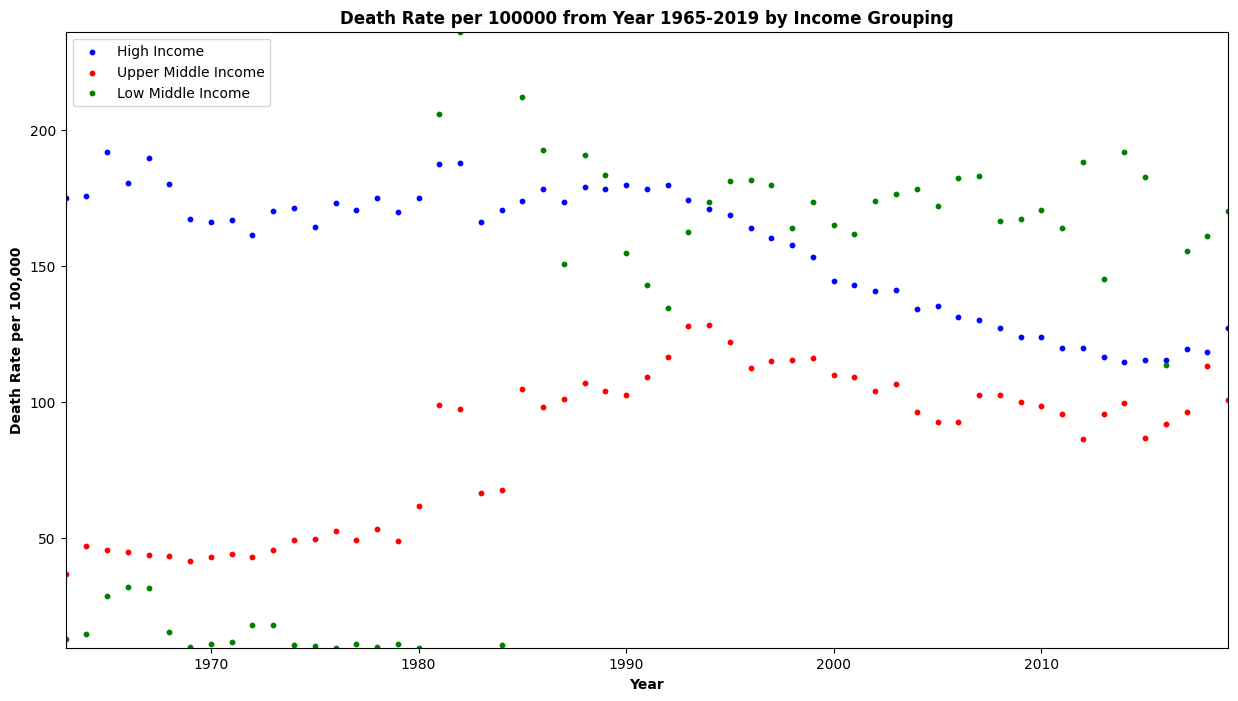

In [50]:
# Plot the graph of Death Rate per 100000 for each Year based on Income Grouping
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
ax1.set_xmargin(0)
ax1.set_ymargin(0)
ax1.set_xlabel("Year", fontdict={'weight':'bold'})
ax1.set_ylabel("Death Rate per 100,000", fontdict={'weight':'bold'})
ax1.set_title("Death Rate per 100000 from Year 1965-2019 by Income Grouping", fontdict={'size':'large', 'weight':'bold'})

ax1.scatter(year_by_high_income, death_rate_per_100000_by_high_income, s=10, c='b', label='High Income')
ax1.scatter(year_by_upper_mid_income, death_rate_per_100000_by_upper_mid_income, s=10, c='r', label='Upper Middle Income')
ax1.scatter(year_by_low_mid_income, death_rate_per_100000_by_low_mid_income, s=10, c='g', label='Low Middle Income')
plt.legend(loc='upper left')
plt.show()

### Data Analysis on Sex

In [51]:
# Group data by income_grouping
ihd_with_ig_grp_sex = ihd_with_ig_df.groupby(['sex']) 

# Display summary statistics of 'death_rate_per_100000' for each income group   
ihd_with_ig_grp_sex['death_rate_per_100000'].describe()  

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,4295.0,116.383657,114.093871,0.0,36.093936,76.903105,167.587665,724.350364
Male,4295.0,140.924186,117.356098,0.0,50.544436,108.383002,202.726511,681.073451


In [52]:
# Group the records by Male, then aggregate the records by Year
ihd_with_ig_grp_male_and_year = groupByIncomeGroupingAndSex(ihd_with_ig_grp_sex, 'Male')

year_by_male = ihd_with_ig_grp_male_and_year['year']
death_rate_per_100000_by_male = ihd_with_ig_grp_male_and_year['death_rate_per_100000']

Income Grouping: Male
    year  death_rate_per_100000
0   1963             153.341469
1   1964             149.585264
2   1965             155.176498
3   1966             151.025342
4   1967             155.774255
5   1968             147.922492
6   1969             139.496730
7   1970             138.130472
8   1971             137.547489
9   1972             137.550034
10  1973             146.508409
11  1974             138.731236
12  1975             141.421665
13  1976             151.785904
14  1977             138.907584
15  1978             148.167126
16  1979             144.944364
17  1980             149.108021
18  1981             169.574925
19  1982             171.239694
20  1983             151.071230
21  1984             148.704559
22  1985             161.797769
23  1986             158.838962
24  1987             154.233585
25  1988             162.323457
26  1989             158.833712
27  1990             157.291061
28  1991             157.539322
29  1992          

In [53]:
# Group the records by Female, then aggregate the records by Year
ihd_with_ig_grp_female_and_year = groupByIncomeGroupingAndSex(ihd_with_ig_grp_sex, 'Female')

year_by_female = ihd_with_ig_grp_female_and_year['year']
death_rate_per_100000_by_female = ihd_with_ig_grp_female_and_year['death_rate_per_100000']

Income Grouping: Female
    year  death_rate_per_100000
0   1963             115.427466
1   1964             111.163798
2   1965             115.784872
3   1966             112.318375
4   1967             114.759788
5   1968             105.723649
6   1969              95.385362
7   1970              94.843278
8   1971              91.767877
9   1972              94.225835
10  1973              99.669022
11  1974              95.156582
12  1975              96.476356
13  1976             102.675769
14  1977              95.630303
15  1978             102.572377
16  1979              98.156854
17  1980             107.205644
18  1981             139.407718
19  1982             142.258861
20  1983             111.451698
21  1984             108.515521
22  1985             139.679615
23  1986             136.909773
24  1987             132.943750
25  1988             140.889752
26  1989             138.327765
27  1990             136.140084
28  1991             136.823747
29  1992        

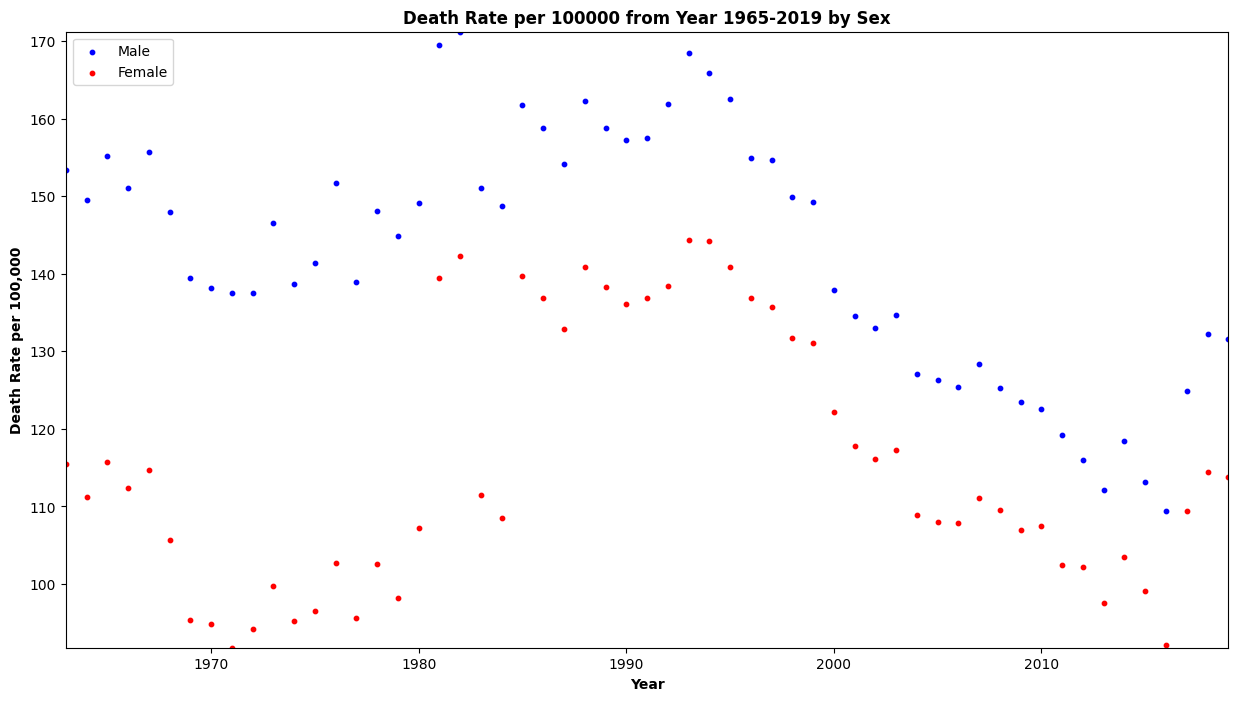

In [54]:
# Plot the graph of Death Rate per 100000 for each Year based on Sex
fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(111)
ax1.set_xmargin(0)
ax1.set_ymargin(0)
ax1.set_xlabel("Year", fontdict={'weight':'bold'})
ax1.set_ylabel("Death Rate per 100,000", fontdict={'weight':'bold'})
ax1.set_title("Death Rate per 100000 from Year 1965-2019 by Sex", fontdict={'size':'large', 'weight':'bold'})

ax1.scatter(year_by_male, death_rate_per_100000_by_male, s=10, c='b', label='Male')
ax1.scatter(year_by_female, death_rate_per_100000_by_female, s=10, c='r', label='Female')
plt.legend(loc='upper left')
plt.show()